In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
from sklearn import cross_validation
from sklearn import datasets

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#load data - house price
housing_data = datasets.load_boston()
#shuffle data
X, Y = shuffle(housing_data.data, housing_data.target, random_state=7)

#split into training and test set
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=7)

In [5]:
#AdaBoost regression model
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
regressor.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [6]:
#evaluating performance of AdaBoost regressor
Y_pred = regressor.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
evs = explained_variance_score(Y_test, Y_pred)
print("\nADABOOST REGRESSOR")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


ADABOOST REGRESSOR
Mean squared error = 22.3
Explained variance score = 0.8


In [16]:
#Calculaing feature importance
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names

In [21]:
#normalize feature importnace values
feature_importnaces = 100.0 * (feature_importances / max(feature_importances))

#sorting index by descending order
index_sorted = np.flipud(np.argsort(feature_importances))

In [22]:
#setting X-ticks
pos = np.arange(index_sorted.shape[0]) + 0.5

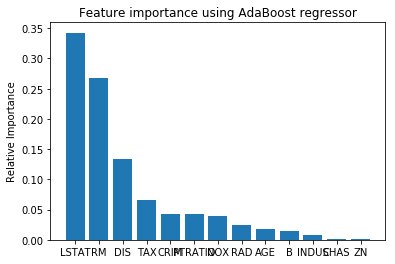

In [23]:
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align="center")
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel("Relative Importance") 
plt.title("Feature importance using AdaBoost regressor")
plt.show()